In [1]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')

from restormer import DataModule, Restormer

%load_ext autoreload
%autoreload 2

In [2]:
torch.set_default_dtype(torch.float32)

## Load trained Restormer

In [3]:
#load trained model
#if self-trained, load from '../notebooks/lightning_logs/version_.../checkpoints/epoch=...'
niter = 200
chn = 36
batch_size = 1
model = Restormer.load_from_checkpoint('../data/trained_model_parameters/checkpoints/epoch=199-step=186800.ckpt', 
                                       n_channels=1, 
                                       niter=niter, 
                                       channels=[chn, chn*2, chn*4, chn*8])

In [4]:
#set to 'cuda' to use gpu
model = model.to('cuda')

## Prediction

In [5]:
sim = torch.load("../data/testing_dataset/sim.pt") #simulated data
scenes = torch.load("../data/testing_dataset/scenes.pt") #scenes
cards = torch.load("../data/testing_dataset/cards.pt") #cards

In [6]:
#expand axes
sim = sim[:, None, :, :]
scenes = scenes[:, None, :, :]
cards = cards[:, None, :, :]

In [31]:
with torch.no_grad():
    sim_pred = model(sim.to(model.device))
    scenes_pred = model(scenes.to(model.device))
    cards_pred = model(cards.to(model.device))

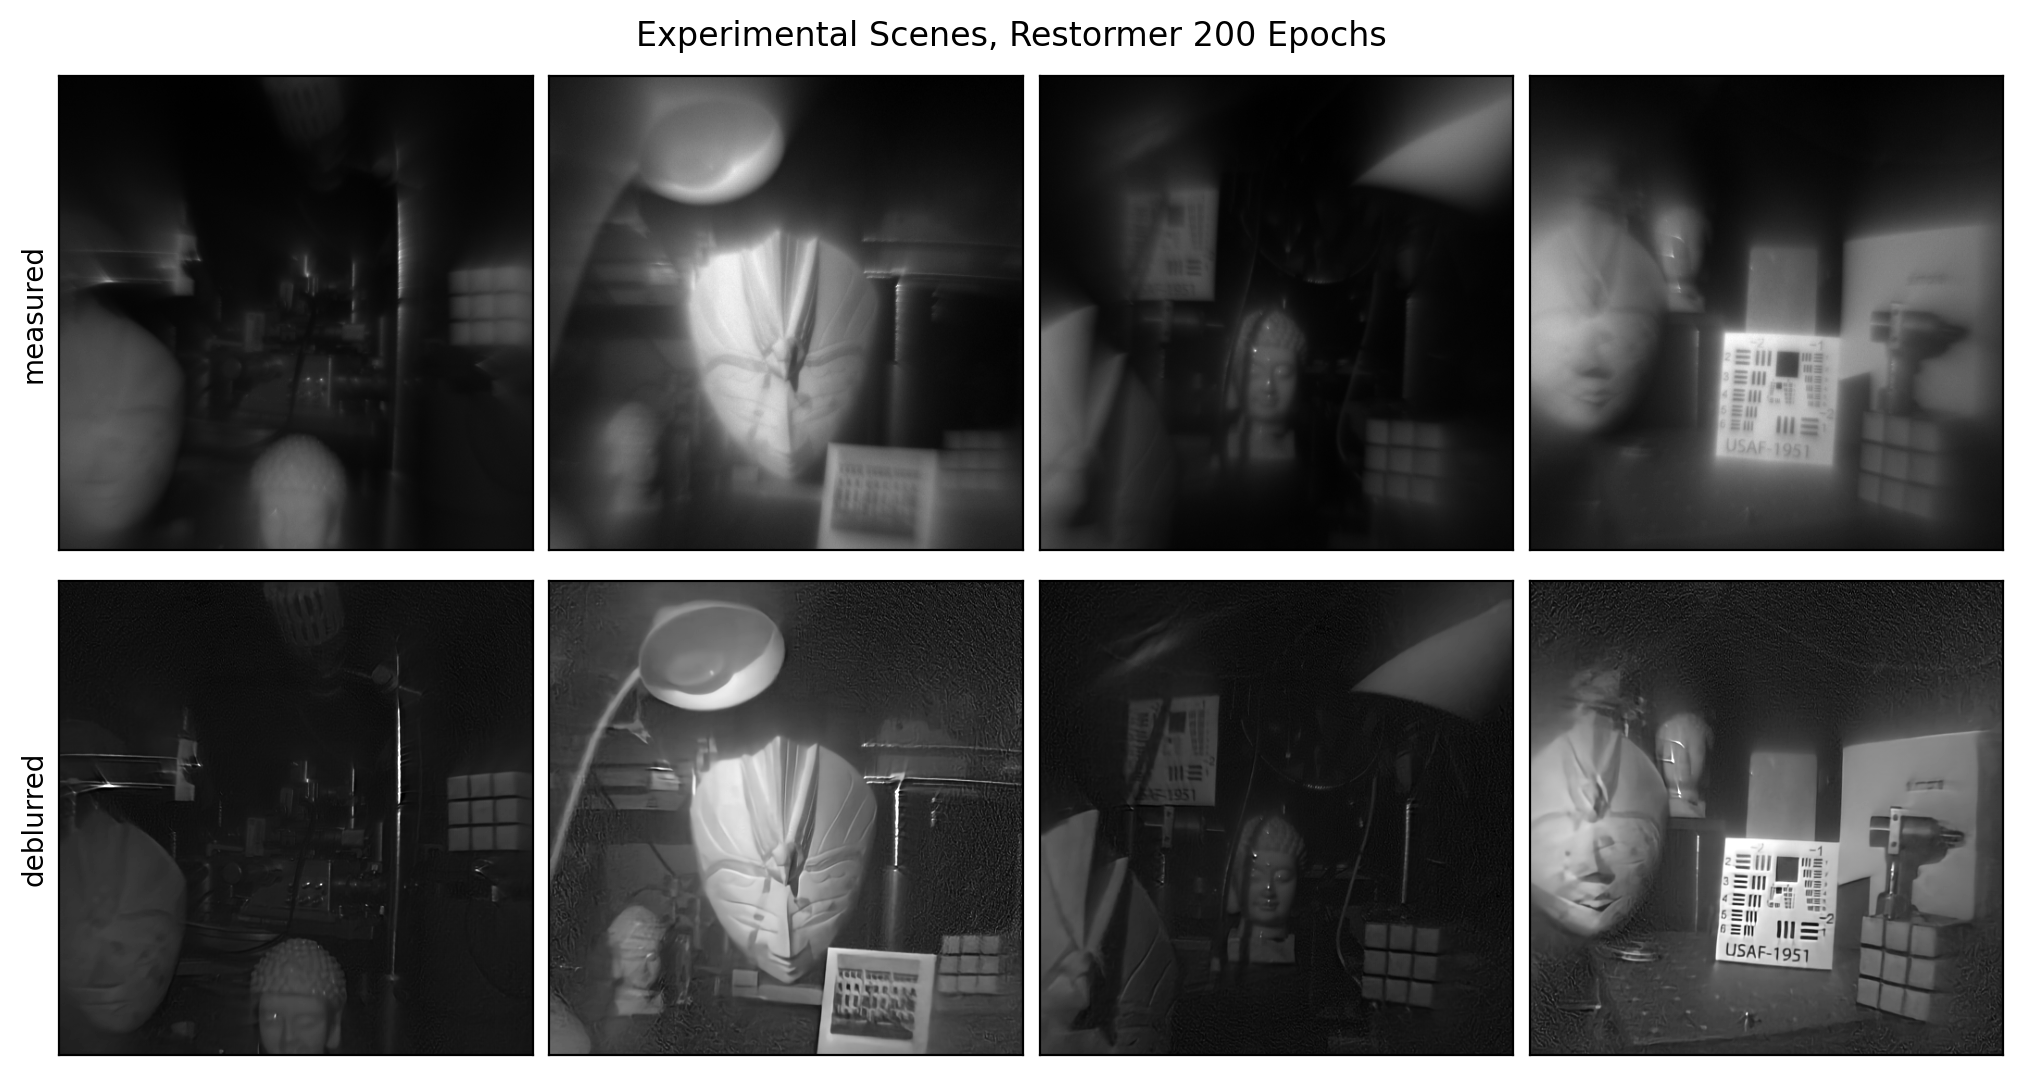

In [8]:
fig, axes = plt.subplots(2,4,constrained_layout=True, figsize=(10,5.3), dpi=200)
[ax.set(xticks=[], yticks=[]) for ax in axes.ravel()]
for i in range(4):
    ax = axes[0,i]
    ax.imshow(scenes[i][0], cmap='grey')
    if i == 0:
        ax.set_ylabel('measured')
    ax = axes[1,i]
    ax.imshow(scenes_pred[i][0].detach().cpu(), vmin=0, vmax=1, cmap='grey')
    if i ==0:
        ax.set_ylabel('deblurred')
plt.suptitle('Experimental Scenes, Restormer 200 Epochs')
plt.show()

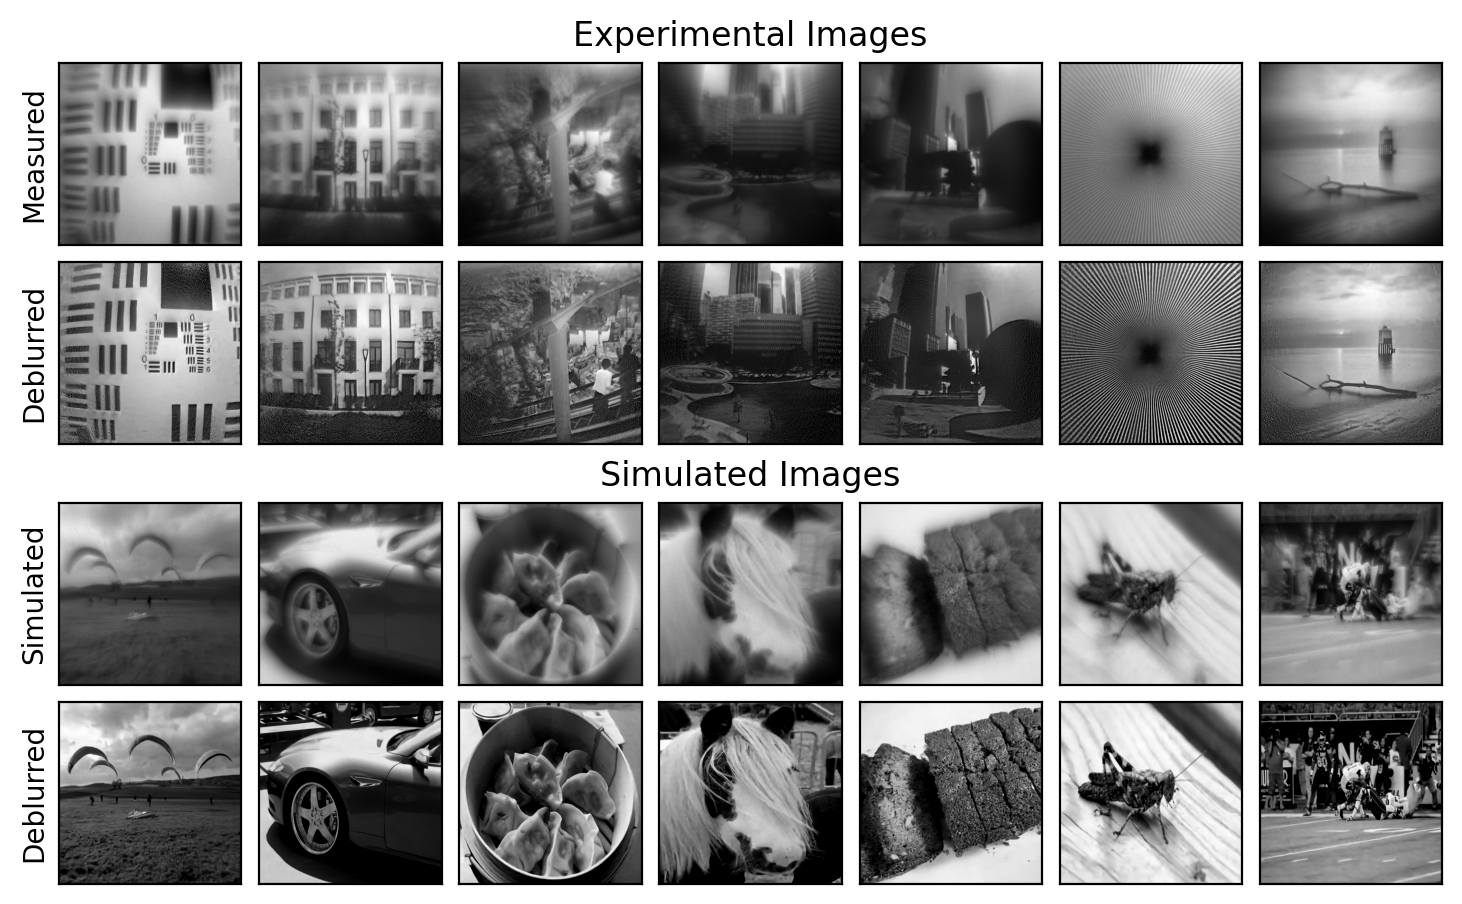

In [44]:
fig, axes = plt.subplots(4,7,constrained_layout=True, figsize=(7.2, 4.4), dpi=200)
[ax.set(xticks=[], yticks=[]) for ax in axes.ravel()]
for i in range(7):
    ax = axes[0,i]
    ax.imshow(cards[i][0], cmap='grey')
    if i == 0:
        ax.set_ylabel('Measured')
    ax = axes[1,i]
    ax.imshow(cards_pred[i][0].detach().cpu(), vmin=0.1, cmap='grey')
    if i ==0:
        ax.set_ylabel('Deblurred')

    ax = axes[2,i]
    ax.imshow(sim[i][0], cmap='grey')
    if i == 0:
        ax.set_ylabel('Simulated')
    ax = axes[3,i]
    ax.imshow(sim_pred[i][0].detach().cpu(), vmin=0.1, cmap='grey')
    if i ==0:
        ax.set_ylabel('Deblurred')
        
axes[0,3].set_title('Experimental Images')
axes[2,3].set_title('Simulated Images')
plt.show()